### Importing Libraries & Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Understanding the data

In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads.shape

(9240, 37)

### Data Cleaning

In [6]:
leads.isnull().sum()/leads.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### As per the data dictionary provided "Select" indicates customer has not selected the specialisation while filling the form upon viewing the data in the above .head() we can see other columns have unselected values also

In [7]:
# Replace all Select with NaN values & recalculating isnull
leads=leads.replace('Select',np.nan)

In [8]:
# Revised null values after Select replaced
leads.isnull().sum()/leads.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Filter columns having more than 50% of null values
blanks=(leads.isnull().sum()/leads.shape[0]*100).sort_values(ascending=False)
blanks[blanks>50]

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
dtype: float64

In [10]:
#duplicate checking for unique id columns
leads["Prospect ID"].value_counts(ascending=False)

ce4360eb-2ac7-4dd3-a24c-84e4ef5a0e85    1
8925181f-1b19-4b79-ba69-fafb588a9a42    1
a805f719-fa90-4887-bf5e-0ee5c975fdc2    1
a053056a-a75d-4aa5-858d-0e2381837b32    1
e7ab4948-c9c4-4ddb-b1b6-2197548db22b    1
                                       ..
52a20b92-5a45-499e-8631-d958713adab1    1
3e3dad74-fbb0-4b98-8a0d-a391383cd599    1
c980b57f-5cc7-4980-908b-b25cfe5a041e    1
3a2d1548-b082-4cf6-9ab3-3bec4b067dc6    1
850c9ef8-d3a5-49ad-b222-d22f11b39f18    1
Name: Prospect ID, Length: 9240, dtype: int64

In [11]:
leads["Lead Number"].value_counts(ascending=False)

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64

In [12]:
leads["Lead Source"].value_counts(ascending=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [13]:
#changing google to Proper Case
leads["Lead Source"] = leads["Lead Source"].str.replace('google','Google')

In [14]:
#droping unnecessary columns as per the data dictionary & columns with blanks> 50% criteria
col_to_drop=['How did you hear about X Education','Lead Profile','Lead Quality',
             'Prospect ID','Lead Number','Asymmetrique Profile Score','Asymmetrique Activity Score',
             'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity', 'Last Activity']

In [15]:
#Defining drop function
def drop_cols(df, col_list):
    df.drop(col_list, axis = 1, inplace = True)

In [16]:
drop_cols(leads, col_to_drop)

In [17]:
leads.shape

(9240, 25)

In [18]:
leads.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

Following columns only have 1 option selected in each, it can be said they have no affect on the lead scoring:
- Magazine 
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content 
- Get updates on DM Content
- I agree to pay the amount through cheque

In [19]:
#dropped columns with only 1 unique value 
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 20)

In [20]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
City                        

In [21]:
# Highest no of null values for imputation
leads.City.value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [22]:
# As we have Country of the customer provided, we will impute city accordingly
leads.groupby(['Country','City'])[['City']].count()

City
Country       City                             
Australia     Mumbai                          6
              Other Cities                    2
              Thane & Outskirts               3
Bahrain       Mumbai                          1
              Other Cities                    2
...                                         ...
United States Other Cities of Maharashtra     5
              Other Metro Cities              4
              Thane & Outskirts               5
              Tier II Cities                  1
Vietnam       Mumbai                          1

[84 rows x 1 columns]

As the data seems highly inaccurate with country & city having no relation in many cases
we will drop city as it has more blank values than country column

In [23]:
drop_cols(leads, 'City')

In [24]:
# 2nd highest no of null values for imputation
leads.Specialization.value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

#### As the blank cases might be actual students or recent graduates looking for jobs which do not fall in any specialisation
Hence we cannot impute the values with mode of the column
We should create a category Others for all such cases

In [25]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

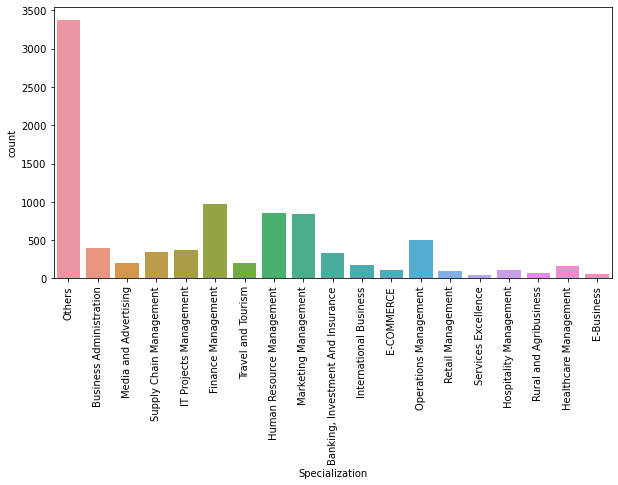

In [26]:
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()

In [27]:
# 3rd highest no of null values for imputation
leads["What matters most to you in choosing a course"].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Being a education company it is obvious "Better Career Prospects" would be the answer by most of the customers
which is indicated by highly skewed data, it is futile to impute the missing values rather we should drop the column altogether

In [28]:
drop_cols(leads, 'What matters most to you in choosing a course')

In [29]:
# 4th highest no of null values for imputation
leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [30]:
leads['What is your current occupation'].fillna('Unknown', inplace = True)

In [31]:
# 5th highest no of null values for imputation
leads['Country'].value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Kuwait                   0.059006
Germany                  0.059006
South Africa             0.059006
Canada                   0.059006
Nigeria                  0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Philippines              0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Uganda                   0.029503
Switzerland              0.014751
Tanzania      

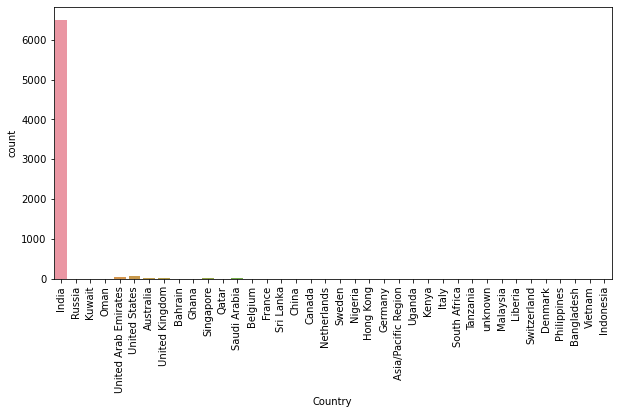

In [32]:
plt.figure(figsize = (10,5))
ax= sns.countplot(leads['Country'])
plt.xticks(rotation = 90)
plt.show()

The data in Column Country is highly skewed towards India. It should be dropped instead of imputing missing value

In [33]:
leads= leads.drop(['Country'],axis=1)

In [34]:
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
NC_EDM                0.010865
testone               0.010865
blog                  0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64

In [35]:
leads.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      137
TotalVisits                               137
Lead Source                                36
A free copy of Mastering The Interview      0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
Through Recommendations                     0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Lead Origin                                 0
dtype: int64

In [36]:
# The missing values are very miniscule it is more prfereable to drop these columns
leads.dropna(inplace = True)
leads.shape

(9074, 17)

In [37]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,No,No,No,No,No,No,No


In [38]:
leads.rename(columns = {'What is your current occupation':'Occupation', 
                           'Through Recommendations':'Recommendations',
                           'A free copy of Mastering The Interview':'Free Copy'}, inplace = True)

In [39]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Recommendations,Free Copy
0,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,No,No,No,No,No,No,No


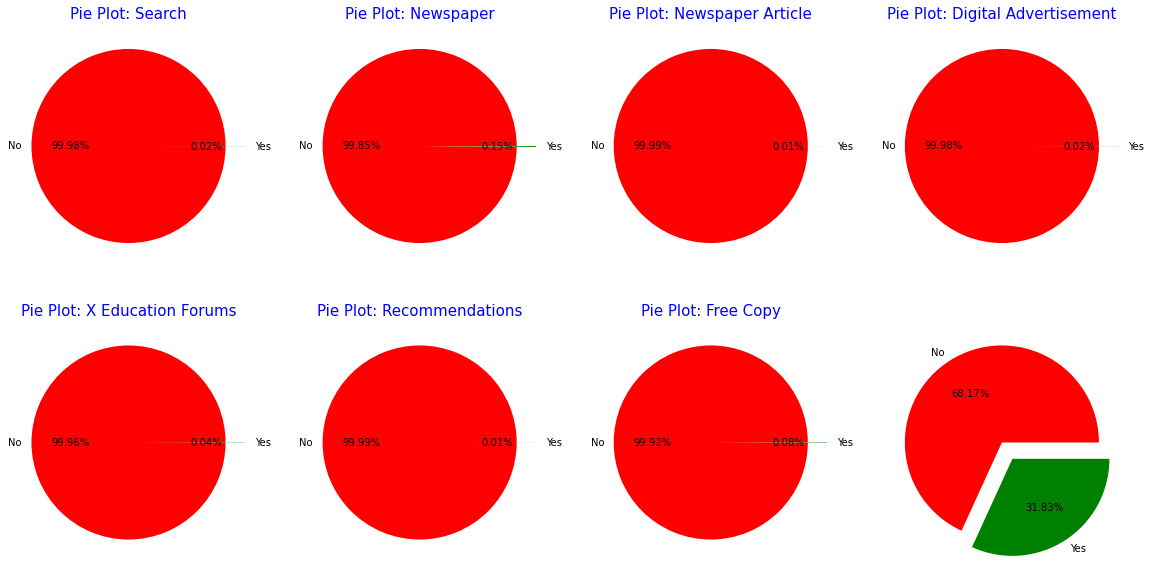

In [40]:
# Checking for skewed data in columns

# Creating column list for binary (yes/no) columns
column_lists = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 
                'Digital Advertisement', 'X Education Forums', 'Recommendations','Free Copy']

# Formating the pie plot
plt.figure(figsize=(20,10))

# Loop through each column names
for Cols in enumerate(column_lists):
    
    # Taking the percentage of data points with respect to target variable
    lead_col_percentage = leads[Cols[1]].value_counts(normalize = True)
    
    plt.title("Pie Plot: " + Cols[1],color='blue',fontsize=15)
    
    plt.subplot(2,4,Cols[0]+1)
    plt.pie(lead_col_percentage,labels=lead_col_percentage.index,autopct='%1.2f%%', 
            colors=['red','green'],explode=(0,0.2))
    
plt.show()

In [41]:
# Dropping above Columns as data is skewed towards one category
# Calling custom function fo dropping above columns
drop_cols(leads,column_lists)

0    5639
1    3435
Name: Converted, dtype: int64


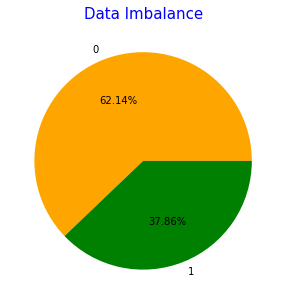

In [42]:
# Data Imbalance   
# Checking value counts for the target variable
print(leads['Converted'].value_counts())

# Taking the percentage of data points with respect to target variable
lead_conv_percentage = leads['Converted'].value_counts(normalize = True)

plt.figure(figsize=(12,5))
plt.title("Data Imbalance",color='blue',fontsize=15)

plt.pie(lead_conv_percentage,labels=lead_conv_percentage.index,autopct='%1.2f%%',colors=['orange','green'])
plt.show()

In the lead conversion ratio, 37.86% has converted to leads where as 62.14% did not convert to a lead. So it seems like a somewhat balanced dataset.

### EDA

In [43]:
# Bivariate & Univariate Analysis

# Calling custom function for count plot and Percentage(%) converted plot

def count_percnt_plot(col):
    
    # Setting figure size
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    
    # Bivariate: Plotting count plot using seaborn library with hue
    sns.countplot(x=col, 
                      data=leads,
                      hue= 'Converted',
                      palette= ["#f93822","#66FF00"],
                      order=leads[col].value_counts().index)
    
    # Formatting the plot with axis labels and title
    plt.title('Bivariate: Count Plot for '+ col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'blue'},pad=15) 
    plt.xlabel(col,fontsize=15,color='blue',labelpad=12)
    plt.ylabel('Count',fontsize=15,color='blue',labelpad=12)
    plt.legend(['Not Converted','Converted'], loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.subplot(1,2,2)
    
    # Grouping original dataframe with column value and calculating mean wrt converted column
    Lead_Org_Percnt = leads.groupby(col)[['Converted']].mean()*100
    
    # Sorting in descending order by Converted percentage
    Lead_Org_Percnt.sort_values(by = 'Converted', ascending = False, inplace = True)
    
    # Barplot to dislay converted percentage under each category value of column
    sns.barplot(Lead_Org_Percnt.index, Lead_Org_Percnt['Converted'])
    
    # Formatting the plot with axis labelsand title
    plt.title('Univariate: Converted (%)', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'blue'},pad=15) 
    plt.xlabel(col,fontsize=15,color='blue',labelpad=12)
    plt.ylabel('Percentage (%)',fontsize=15,color='blue',labelpad=6)
    plt.xticks(rotation=90, ha='right')
    
    # Showing the plot using matplotlib.pyplot show() function
    plt.show()
    
    # Display Percentage converted in tabular format
    print('')
    print('____________________________')
    Lead_Org_Percnt['Converted'] = round(Lead_Org_Percnt['Converted'],2).astype(str)+'%'
    print(Lead_Org_Percnt)
    print('____________________________')

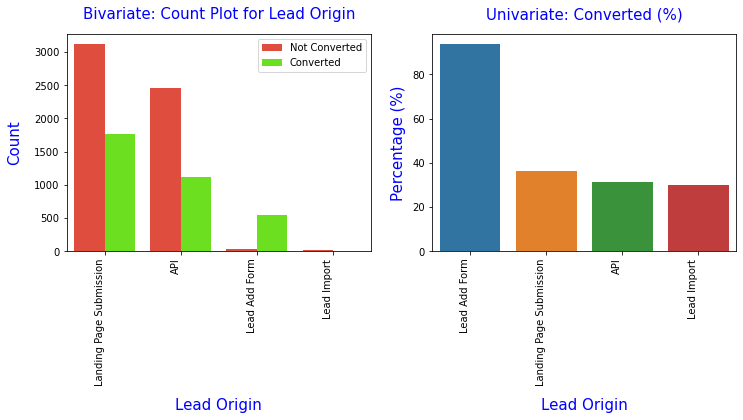


____________________________
                        Converted
Lead Origin                      
Lead Add Form              93.63%
Landing Page Submission    36.17%
API                        31.16%
Lead Import                 30.0%
____________________________


In [44]:
count_percnt_plot('Lead Origin')

#### Inference:

- Most Leads originated from submissions on the `landing page and around 36.17% of those are converted` followed by `API, where around 31.16% are converted`.
- Leads from the `Lead Add Form have the highest conversions in this category at around 93.63%`.
- Lead Import are very less in count and conversion rate is also the lowest at 30%
- To improve overall lead conversion rate, **we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

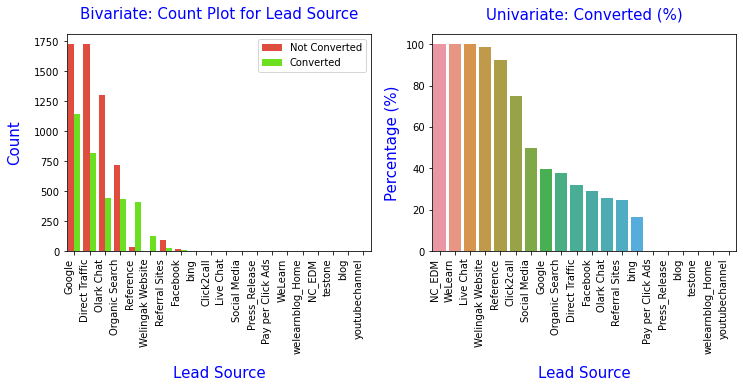


____________________________
                  Converted
Lead Source                
NC_EDM               100.0%
WeLearn              100.0%
Live Chat            100.0%
Welingak Website     98.45%
Reference            92.55%
Click2call            75.0%
Social Media          50.0%
Google               39.92%
Organic Search       37.78%
Direct Traffic       32.17%
Facebook             29.03%
Olark Chat           25.56%
Referral Sites        24.8%
bing                 16.67%
Pay per Click Ads      0.0%
Press_Release          0.0%
blog                   0.0%
testone                0.0%
welearnblog_Home       0.0%
youtubechannel         0.0%
____________________________


In [45]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Lead Source' & 'converted' column
count_percnt_plot('Lead Source')

In [46]:
# We have to consolidate the minor lead sources to better view the results graphically
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

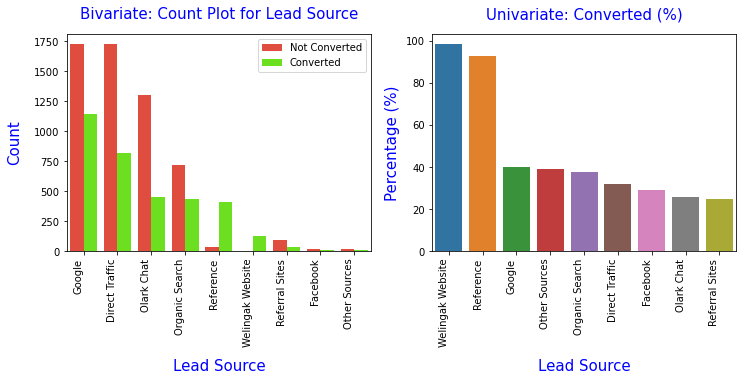


____________________________
                 Converted
Lead Source               
Welingak Website    98.45%
Reference           92.55%
Google              39.92%
Other Sources       39.13%
Organic Search      37.78%
Direct Traffic      32.17%
Facebook            29.03%
Olark Chat          25.56%
Referral Sites       24.8%
____________________________


In [47]:
count_percnt_plot('Lead Source')

#### Inference:

- The source of the most leads was `Google, and 39.92% of the leads converted`, followed by `Direct Traffic, Olark chat & Organic search by which 32.17%, 25.56% and 37.78% converted` respectively.
- `Welingak Website has almost 98.45% lead conversion rate`. This option should be advertised more to increase lead conversions
- A leads from a `reference has over 92.55% conversion`.
- To increase lead count, **initiatives should be taken so already existing members increase their referrals.**

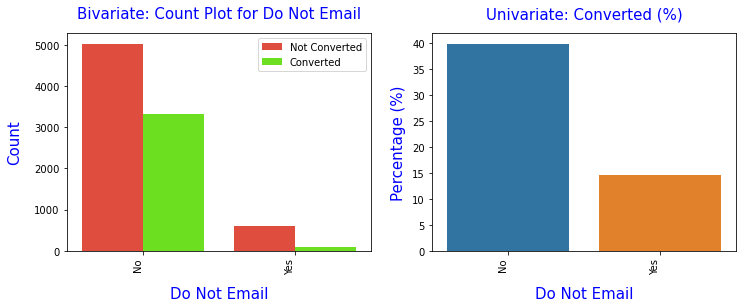


____________________________
             Converted
Do Not Email          
No              39.85%
Yes             14.53%
____________________________


In [48]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Do Not Email' & 'converted' column
count_percnt_plot('Do Not Email')

#### Inference:

- Majority of the people are `ok with receiving email (~92%)`
- People who are `ok with email has conversion rate of 39.85%`
- People who have opted out of receive email has `lower rate of conversion (only 14.53%)`

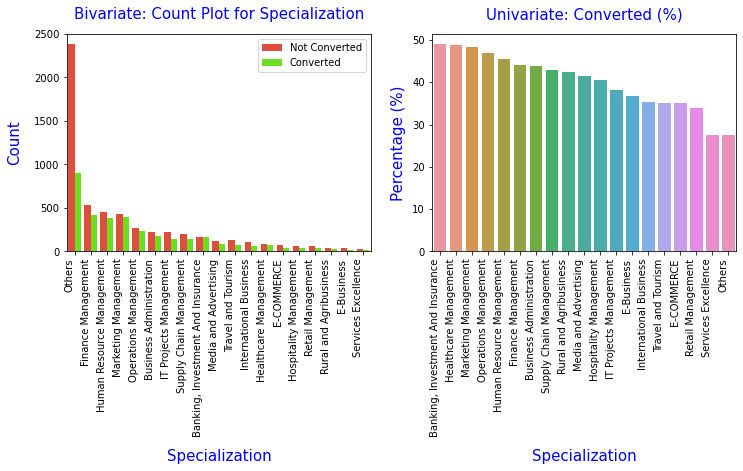


____________________________
                                  Converted
Specialization                             
Banking, Investment And Insurance    48.96%
Healthcare Management                48.72%
Marketing Management                 48.24%
Operations Management                46.89%
Human Resource Management             45.4%
Finance Management                    44.0%
Business Administration              43.86%
Supply Chain Management              42.77%
Rural and Agribusiness               42.47%
Media and Advertising                41.58%
Hospitality Management               40.54%
IT Projects Management               38.25%
E-Business                           36.84%
International Business               35.23%
Travel and Tourism                   35.15%
E-COMMERCE                           35.14%
Retail Management                     34.0%
Services Excellence                   27.5%
Others                               27.45%
____________________________


In [49]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Specialization' & 'converted' column
count_percnt_plot('Specialization')

#### Inference:

- Most of the leads have not mentioned a `specialization and around 27.45% of those converted`
- Leads with specialization in `Banking, Investment And Insurance; Healthcare or Marketing` - Over 48% Converted

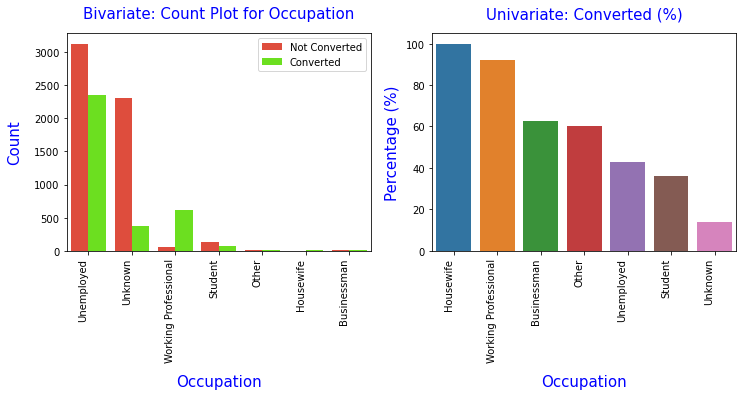


____________________________
                     Converted
Occupation                    
Housewife               100.0%
Working Professional    91.88%
Businessman              62.5%
Other                    60.0%
Unemployed              42.84%
Student                 35.92%
Unknown                 13.79%
____________________________


In [50]:
# Calling custom function for Bivariate & Univariate visualization wrt 'Occupation' & 'converted' column
count_percnt_plot('Occupation')

#### Inference:

- Category `Housewives` are less in quantity, but have `100% conversion rate` followed by `Working professionals` have >90% conversion rate
- Though Unemployed people have been contacted in the highest number, the conversion rate is low (42.84%)
- As mentioned earlier category Other, Unknown & unemployed cannot be combined as their individual conversion rates differ & would adversely impact the decision overall if consolidated.

In [52]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9074 non-null   object 
 1   Lead Source                  9074 non-null   object 
 2   Do Not Email                 9074 non-null   object 
 3   Converted                    9074 non-null   int64  
 4   TotalVisits                  9074 non-null   float64
 5   Total Time Spent on Website  9074 non-null   int64  
 6   Page Views Per Visit         9074 non-null   float64
 7   Specialization               9074 non-null   object 
 8   Occupation                   9074 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.0+ MB


In [53]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9074 non-null   object 
 1   Lead Source                  9074 non-null   object 
 2   Do Not Email                 9074 non-null   object 
 3   Converted                    9074 non-null   int64  
 4   TotalVisits                  9074 non-null   float64
 5   Total Time Spent on Website  9074 non-null   int64  
 6   Page Views Per Visit         9074 non-null   float64
 7   Specialization               9074 non-null   object 
 8   Occupation                   9074 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.0+ MB


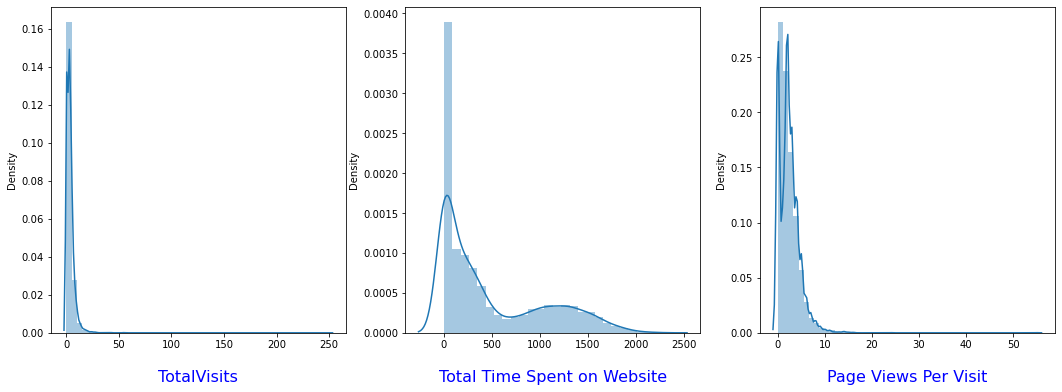

In [54]:
# Univariate Analysis - Numerical columns

plt.figure(figsize = (18,6))

# Formatting plot display and axis for distribution plot of 'TotalVisits' numeric column
plt.subplot(1,3,1)
ax = sns.distplot(leads['TotalVisits'])
ax.set_xlabel('TotalVisits',fontsize = 16, color = 'blue', labelpad = 20)

# Formatting plot display and axis for distribution plot of 'Total Time Spent on Website' numeric column
plt.subplot(1,3,2)
ax = sns.distplot(leads['Total Time Spent on Website'])
ax.set_xlabel('Total Time Spent on Website',fontsize = 16, color = 'blue', labelpad = 20)

# Formatting plot display and axis for distribution plot of 'Page Views Per Visit' numeric column
plt.subplot(1,3,3)
ax = sns.distplot(leads['Page Views Per Visit'])
ax.set_xlabel('Page Views Per Visit',fontsize = 16, color = 'blue', labelpad = 20)

plt.show()

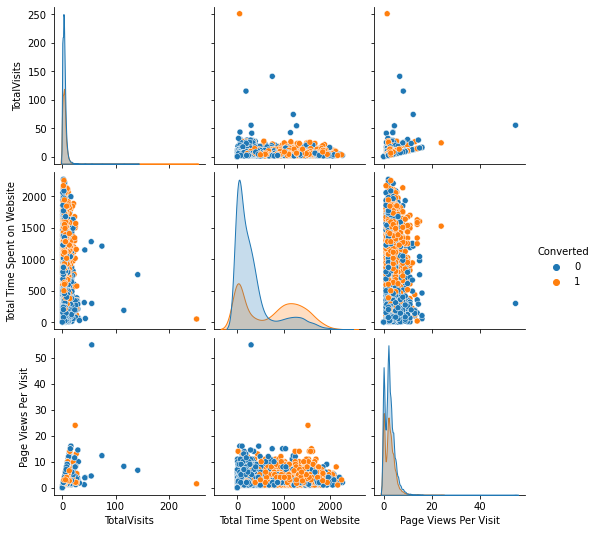

In [55]:
# Creating numerical column list
numeric_col = leads.select_dtypes(include =["number"]).columns.values

sns.pairplot(leads[numeric_col], hue = 'Converted') 
plt.show()

#### Inference:

- Data is not `normally distributed`.
- There are `no linear relationship between the continuous features` as shown by the above pair plot

In [56]:
# Outlier treatment
leads.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


#### Inference: 

Though outliers in `TotalVisits and Page Views Per Visit` shows valid values, this `will misclassify the outcomes and consequently create problems when making inferences` with the wrong model. Logistic Regression is influenced by outliers. We will **cap the TotalVisits and Page Views Per Visit to their 95th percentile** due to following reasons:

- Data set is fairly high number
- 95th percentile and 99th percentile of these columns are very close and hence impact of the capping to 95th or 99th percentile will be the same.

In [57]:
# Outlier Treatment: Perform hard capping between (5% - 95%) on numerical columns

# Loop through numerical columns
for col in numeric_col:
    
    # Taking 95% percentile value
    quant_95 = leads[col].quantile(0.95)
    
    # Capping with the 95% value for all >= 95% numerical column values
    leads[col][leads[col] >=  quant_95] = quant_95

In [58]:
# Checking Percentiles again to verify hard capping performed to set all >= 95% value with 95% value

leads.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,474.472559,2.265943
std,0.485053,2.780618,526.060205,1.790991
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,10.000000,1557.000000,6.000000


In [59]:
# Checking value count before binary conversion on yes/no columns
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [60]:
# Binary column value conversion: yes/no to 1/0 conversion 

leads['Do Not Email'] = leads['Do Not Email'].map({'No' : 0, 'Yes' : 1})

In [61]:
# Checking value count after binary conversion on yes/no columns
leads['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [62]:
# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler

# Import libraries for model building - dataset spliting, feature selection
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cat_data=leads[list(leads.select_dtypes(exclude=numerics).columns)]
list_cat_var = []
for column in cat_data:
    _ = leads[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print("{:<30} = {}".format(column,_))
        
master_leads = pd.get_dummies(leads,columns=list_cat_var,drop_first=True)

Lead Origin                    = 4
Lead Source                    = 9
Specialization                 = 19
Occupation                     = 7


In [64]:
master_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
master_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9074 non-null   int64  
 1   Converted                                 9074 non-null   int64  
 2   TotalVisits                               9074 non-null   float64
 3   Total Time Spent on Website               9074 non-null   int64  
 4   Page Views Per Visit                      9074 non-null   float64
 5   Lead Origin_Landing Page Submission       9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9074 non-null   uint8  
 7   Lead Origin_Lead Import                   9074 non-null   uint8  
 8   Lead Source_Facebook                      9074 non-null   uint8  
 9   Lead Source_Google                        9074 non-null   uint8  
 10  Lead Source_Olark Chat              

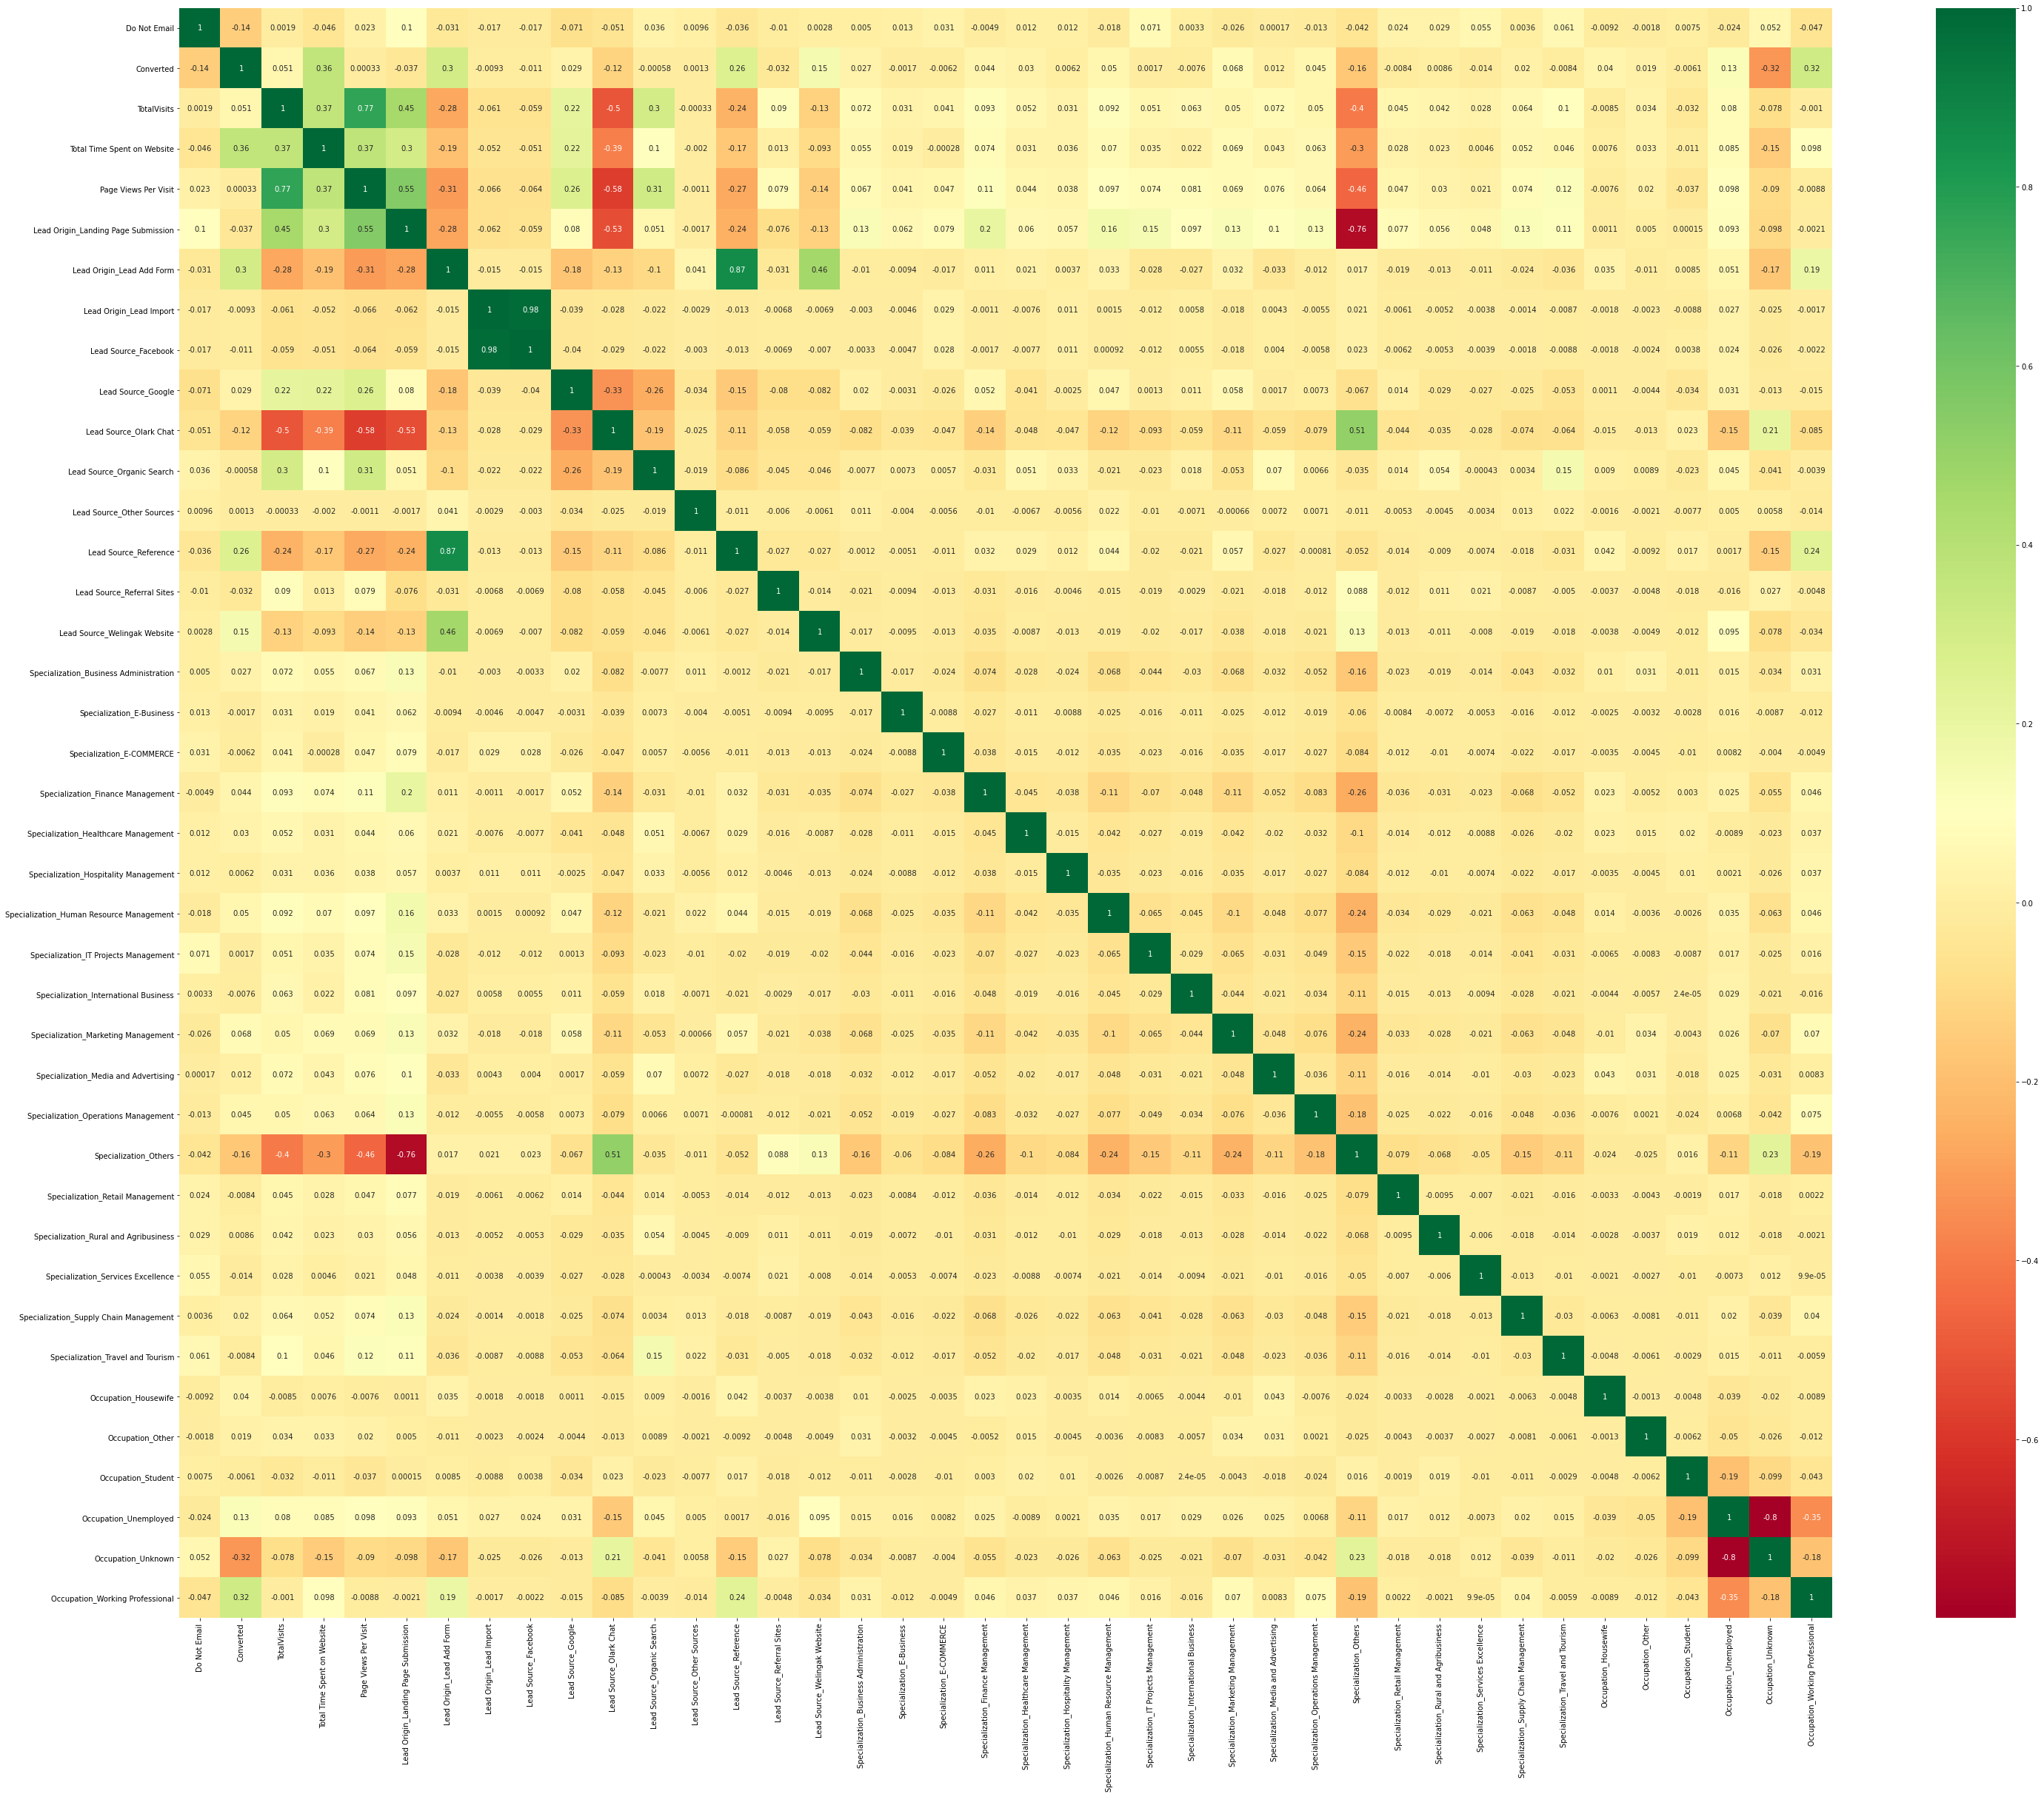

In [66]:
# Correlation check among all numerical features using Heatmap
plt.figure(figsize = (50,40))
sns.heatmap(master_leads.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

#### No of columns are to high to check for multicollinearity and drop individually, it is better to use RFE to drop columns 

### Logistic Regression Modeling

In [67]:
Y = master_leads['Converted']
X = master_leads.drop(['Converted'], axis=1)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

In [69]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [70]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.3
Date:                Sun, 11 Jul 2021   Deviance:                       5534.7
Time:                        01:22:36   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4167      1.064      0.392      0.695      -1.668       2.502
Do Not Email                                -1.3921      0.168     -8.274      0.000      -1.722      -1.062
TotalVisits                                  0.2352      0.052      4.517      0.000       0.133       0.337
Total Time Spent on Website                  1.1465      0.040     28.902      0.000       1.069       1.224
Page Views Per Visit                        -0.1445      0.060     -2.419      0.016      -0.261      -0.027
Lead Origin_Landing Page Submission         -0.6402      0.130     -4.915      0.000      -0.896      -0.385
Lead Origin_Lead Add Form                    1.2696      1.081      1.174      0.240      -0.850       3.389
Lead Origin_Lead Import                     21.5354   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                       -20.3740   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                           0.3539      0.093      3.801      0.000       0.171       0.536
Lead Source_Olark Chat                       1.4757      0.153      9.657      0.000       1.176       1.775
Lead Source_Organic Search                   0.1858      0.125      1.484      0.138      -0.060       0.431
Lead Source_Other Sources                    0.9010      0.660      1.364      0.173      -0.393       2.195
Lead Source_Reference                        2.6422      1.101      2.399      0.016       0.484       4.801
Lead Source_Referral Sites                  -0.2618      0.349     -0.750      0.453      -0.946       0.422
Lead Source_Welingak Website                 5.0393      1.299      3.880      0.000       2.493       7.585
Specialization_Business Administration      -0.2933      0.237     -1.237      0.216      -0.758       0.171
Specialization_E-Business                   -0.0158      0.428     -0.037      0.971      -0.855       0.824
Specialization_E-COMMERCE                   -0.0034      0.345     -0.010      0.992      -0.679       0.672
Specialization_Finance Management           -0.2330      0.198     -1.179      0.238      -0.620       0.154
Specialization_Healthcare Management        -0.2224      0.305     -0.728      0.467      -0.821       0.376
Specialization_Hospitality Management       -0.7620      0.355     -2.148      0.032      -1.457      -0.067
Specialization_Human Resource Management    -0.3559      0.200     -1.780      0.075      -0.748       0.036
Specialization_IT Projects Management       -0.0994      0.239     -0.416      0.677      -0.568       0.369
Specialization_International Business       -0.3598      0.289     -1.246      0.213      -0.926       0.206
Specialization_Marketing Manage

In [71]:
# from sklearn.linear_model import Logistic Regression
logreg = LogisticRegression()

# from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Other Sources', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 7),
 ('Specialization_Finance Management', False, 22),
 ('Specialization_Healthcare Management', False, 23),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 19),
 ('Specialization_IT Projects Management', False, 25),

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Services Excellence',
       'Occupation_Housewife', 'Occupation_Unknown',
       'Occupation_Working Professional'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed'],
      dtype='object')

In [75]:
# Model assessment
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2791.0
Date:                Sun, 11 Jul 2021   Deviance:                       5582.1
Time:                        01:22:55   Pearson chi2:                 6.37e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0615      0.119      0.518      0.604      -0.171       0.294
Do Not Email                             -1.4539      0.166     -8.744      0.000      -1.780      -1.128
Total Time Spent on Website               1.1454      0.039     29.145      0.000       1.068       1.222
Lead Origin_Landing Page Submission      -0.8171      0.123     -6.629      0.000      -1.059      -0.575
Lead Origin_Lead Add Form                 1.6711      0.944      1.771      0.077      -0.178       3.521
Lead Origin_Lead Import                   0.7416      0.473      1.568      0.117      -0.185       1.669
Lead Source_Olark Chat                    1.0845      0.117      9.232      0.000       0.854       1.315
Lead Source_Reference                     1.8359      0.965      1.902      0.057      -0.055       3.727
Lead Source_Referral Sites               -0.4774      0.337     -1.416      0.157      -1.138       0.183
Lead Source_Welingak Website              4.2662      1.186      3.598      0.000       1.943       6.590
Specialization_Hospitality Management    -0.4738      0.311     -1.522      0.128      -1.084       0.136
Specialization_Others                    -0.9263      0.119     -7.754      0.000      -1.160      -0.692
Specialization_Services Excellence       -0.4745      0.630     -0.753      0.451      -1.709       0.760
Occupation_Housewife                     22.2462   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
Occupation_Unknown                       -1.2993      0.085    -15.319      0.000      -1.466      -1.133
Occupation_Working Professional           2.3774      0.185     12.878      0.000       2.016       2.739
=========================================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
6,Lead Source_Reference,48.06
8,Lead Source_Welingak Website,15.49
10,Specialization_Others,2.08
5,Lead Source_Olark Chat,1.94
13,Occupation_Unknown,1.59
2,Lead Origin_Landing Page Submission,1.39
1,Total Time Spent on Website,1.29
14,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [77]:
col1 = col.drop('Occupation_Housewife',1)

In [78]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.1
Date:                Sun, 11 Jul 2021   Deviance:                       5588.2
Time:                        01:23:27   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0654      0.119      0.552      0.581      -0.167       0.298
Do Not Email                             -1.4565      0.166     -8.759      0.000      -1.782      -1.131
Total Time Spent on Website               1.1446      0.039     29.150      0.000       1.068       1.222
Lead Origin_Landing Page Submission      -0.8169      0.123     -6.632      0.000      -1.058      -0.576
Lead Origin_Lead Add Form                 1.6682      0.944      1.768      0.077      -0.181       3.518
Lead Origin_Lead Import                   0.7384      0.473      1.561      0.118      -0.189       1.665
Lead Source_Olark Chat                    1.0833      0.117      9.223      0.000       0.853       1.313
Lead Source_Reference                     1.8465      0.965      1.913      0.056      -0.045       3.738
Lead Source_Referral Sites               -0.4783      0.337     -1.419      0.156      -1.139       0.182
Lead Source_Welingak Website              4.2684      1.186      3.600      0.000       1.944       6.592
Specialization_Hospitality Management    -0.4769      0.311     -1.532      0.125      -1.087       0.133
Specialization_Others                    -0.9294      0.119     -7.784      0.000      -1.163      -0.695
Specialization_Services Excellence       -0.4774      0.630     -0.758      0.449      -1.712       0.758
Occupation_Unknown                       -1.3010      0.085    -15.342      0.000      -1.467      -1.135
Occupation_Working Professional           2.3740      0.185     12.860      0.000       2.012       2.736
=========================================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
6,Lead Source_Reference,48.05
8,Lead Source_Welingak Website,15.49
10,Specialization_Others,2.08
5,Lead Source_Olark Chat,1.94
12,Occupation_Unknown,1.59
2,Lead Origin_Landing Page Submission,1.39
1,Total Time Spent on Website,1.29
13,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [80]:
col1 = col1.drop('Specialization_Services Excellence',1)

In [81]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.4
Date:                Sun, 11 Jul 2021   Deviance:                       5588.8
Time:                        01:23:47   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0626      0.119      0.528      0.597      -0.170       0.295
Do Not Email                             -1.4617      0.166     -8.797      0.000      -1.787      -1.136
Total Time Spent on Website               1.1448      0.039     29.157      0.000       1.068       1.222
Lead Origin_Landing Page Submission      -0.8159      0.123     -6.625      0.000      -1.057      -0.575
Lead Origin_Lead Add Form                 1.6698      0.944      1.770      0.077      -0.179       3.519
Lead Origin_Lead Import                   0.7403      0.473      1.565      0.117      -0.187       1.667
Lead Source_Olark Chat                    1.0830      0.117      9.221      0.000       0.853       1.313
Lead Source_Reference                     1.8448      0.965      1.912      0.056      -0.046       3.736
Lead Source_Referral Sites               -0.4789      0.337     -1.422      0.155      -1.139       0.181
Lead Source_Welingak Website              4.2682      1.186      3.600      0.000       1.944       6.592
Specialization_Hospitality Management    -0.4743      0.311     -1.524      0.127      -1.084       0.136
Specialization_Others                    -0.9264      0.119     -7.763      0.000      -1.160      -0.693
Occupation_Unknown                       -1.3007      0.085    -15.341      0.000      -1.467      -1.135
Occupation_Working Professional           2.3720      0.185     12.852      0.000       2.010       2.734
=========================================================================================================
"""

In [82]:
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
6,Lead Source_Reference,48.05
8,Lead Source_Welingak Website,15.49
10,Specialization_Others,2.08
5,Lead Source_Olark Chat,1.93
11,Occupation_Unknown,1.58
2,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.29
12,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [83]:
col1 = col1.drop('Specialization_Hospitality Management',1)

In [84]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.6
Date:                Sun, 11 Jul 2021   Deviance:                       5591.2
Time:                        01:24:22   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0549      0.118      0.463      0.643      -0.177       0.287
Do Not Email                           -1.4675      0.166     -8.828      0.000      -1.793      -1.142
Total Time Spent on Website             1.1429      0.039     29.148      0.000       1.066       1.220
Lead Origin_Landing Page Submission    -0.8155      0.123     -6.621      0.000      -1.057      -0.574
Lead Origin_Lead Add Form               1.6724      0.943      1.774      0.076      -0.175       3.520
Lead Origin_Lead Import                 0.7431      0.473      1.572      0.116      -0.183       1.669
Lead Source_Olark Chat                  1.0802      0.117      9.202      0.000       0.850       1.310
Lead Source_Reference                   1.8326      0.964      1.901      0.057      -0.057       3.722
Lead Source_Referral Sites             -0.4767      0.337     -1.416      0.157      -1.136       0.183
Lead Source_Welingak Website            4.2645      1.185      3.599      0.000       1.942       6.587
Specialization_Others                  -0.9175      0.119     -7.698      0.000      -1.151      -0.684
Occupation_Unknown                     -1.3000      0.085    -15.336      0.000      -1.466      -1.134
Occupation_Working Professional         2.3664      0.184     12.826      0.000       2.005       2.728
=======================================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
6,Lead Source_Reference,48.05
8,Lead Source_Welingak Website,15.49
9,Specialization_Others,2.08
5,Lead Source_Olark Chat,1.93
10,Occupation_Unknown,1.58
2,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.29
11,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [86]:
col1 = col1.drop('Lead Source_Referral Sites',1)

In [87]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2796.6
Date:                Sun, 11 Jul 2021   Deviance:                       5593.3
Time:                        01:24:35   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0397      0.118      0.336      0.737      -0.191       0.271
Do Not Email                           -1.4656      0.166     -8.819      0.000      -1.791      -1.140
Total Time Spent on Website             1.1439      0.039     29.171      0.000       1.067       1.221
Lead Origin_Landing Page Submission    -0.8024      0.123     -6.538      0.000      -1.043      -0.562
Lead Origin_Lead Add Form               1.6888      0.944      1.789      0.074      -0.161       3.539
Lead Origin_Lead Import                 0.7619      0.473      1.612      0.107      -0.164       1.688
Lead Source_Olark Chat                  1.1018      0.117      9.454      0.000       0.873       1.330
Lead Source_Reference                   1.8360      0.965      1.902      0.057      -0.056       3.728
Lead Source_Welingak Website            4.2702      1.186      3.601      0.000       1.946       6.594
Specialization_Others                  -0.9242      0.119     -7.765      0.000      -1.157      -0.691
Occupation_Unknown                     -1.3001      0.085    -15.342      0.000      -1.466      -1.134
Occupation_Working Professional         2.3642      0.185     12.805      0.000       2.002       2.726
=======================================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
6,Lead Source_Reference,48.05
7,Lead Source_Welingak Website,15.49
8,Specialization_Others,2.02
5,Lead Source_Olark Chat,1.91
9,Occupation_Unknown,1.58
2,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.29
10,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [89]:
col1 = col1.drop('Lead Origin_Lead Import',1)

In [90]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.9
Date:                Sun, 11 Jul 2021   Deviance:                       5595.7
Time:                        01:24:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0725      0.116      0.624      0.533      -0.155       0.300
Do Not Email                           -1.4671      0.166     -8.831      0.000      -1.793      -1.142
Total Time Spent on Website             1.1378      0.039     29.197      0.000       1.061       1.214
Lead Origin_Landing Page Submission    -0.8320      0.122     -6.847      0.000      -1.070      -0.594
Lead Origin_Lead Add Form               1.6620      0.944      1.761      0.078      -0.188       3.512
Lead Source_Olark Chat                  1.0799      0.116      9.343      0.000       0.853       1.306
Lead Source_Reference                   1.8348      0.966      1.900      0.057      -0.058       3.727
Lead Source_Welingak Website            4.2769      1.186      3.606      0.000       1.952       6.602
Specialization_Others                  -0.9424      0.119     -7.936      0.000      -1.175      -0.710
Occupation_Unknown                     -1.3013      0.085    -15.366      0.000      -1.467      -1.135
Occupation_Working Professional         2.3643      0.185     12.805      0.000       2.002       2.726
=======================================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
5,Lead Source_Reference,48.05
6,Lead Source_Welingak Website,15.49
7,Specialization_Others,2.01
4,Lead Source_Olark Chat,1.90
8,Occupation_Unknown,1.58
2,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.28
9,Occupation_Working Professional,1.18
0,Do Not Email,1.11


In [92]:
col1 = col1.drop('Lead Origin_Lead Add Form',1)

In [93]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.5
Date:                Sun, 11 Jul 2021   Deviance:                       5599.0
Time:                        01:25:03   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0910      0.116      0.785      0.432      -0.136       0.318
Do Not Email                           -1.4683      0.166     -8.839      0.000      -1.794      -1.143
Total Time Spent on Website             1.1355      0.039     29.180      0.000       1.059       1.212
Lead Origin_Landing Page Submission    -0.8487      0.121     -7.002      0.000      -1.086      -0.611
Lead Source_Olark Chat                  1.0723      0.115      9.295      0.000       0.846       1.298
Lead Source_Reference                   3.4832      0.237     14.708      0.000       3.019       3.947
Lead Source_Welingak Website            5.9302      0.726      8.169      0.000       4.507       7.353
Specialization_Others                  -0.9541      0.119     -8.043      0.000      -1.187      -0.722
Occupation_Unknown                     -1.3031      0.085    -15.394      0.000      -1.469      -1.137
Occupation_Working Professional         2.3607      0.185     12.783      0.000       1.999       2.723
=======================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
6,Specialization_Others,2.01
3,Lead Source_Olark Chat,1.90
7,Occupation_Unknown,1.58
2,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.28
4,Lead Source_Reference,1.18
8,Occupation_Working Professional,1.18
0,Do Not Email,1.11
5,Lead Source_Welingak Website,1.09


In [95]:
#Coefficients
round(res8.params.sort_values(ascending=False),4)

Lead Source_Welingak Website           5.9302
Lead Source_Reference                  3.4832
Occupation_Working Professional        2.3607
Total Time Spent on Website            1.1355
Lead Source_Olark Chat                 1.0723
const                                  0.0910
Lead Origin_Landing Page Submission   -0.8487
Specialization_Others                 -0.9541
Occupation_Unknown                    -1.3031
Do Not Email                          -1.4683
dtype: float64

In [96]:
# Getting the predicted values on the train set
Y_train_pred = res8.predict(X_train_sm)
Y_train_pred = Y_train_pred.values.reshape(-1)

In [97]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_prob':Y_train_pred})

In [98]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [99]:
# Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, 
                                     Y_train_pred_final.predicted )
print(Confusion_Mat)

[[3453  452]
 [ 792 1654]]


In [100]:
# Overall Accuracy - Train
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.8041253345929775


In [101]:
#True positive 
TP = Confusion_Mat[1,1] 

#True negatives
TN = Confusion_Mat[0,0] 

#False positives
FP = Confusion_Mat[0,1] 

#False negatives
FN = Confusion_Mat[1,0]

In [102]:
print('Sensitivity of our logistic regression model :',TP / float(TP+FN))
print('Specificity of our logistic regression model :',TN / float(TN+FP))
print('Calculation of False Positive Rate :',FP/ float(TN+FP))
print('Positive Predictive Value :',TP / float(TP+FP))
print('Negative Predictive Value :',TN / float(TN+ FN))

Sensitivity of our logistic regression model : 0.6762060506950123
Specificity of our logistic regression model : 0.8842509603072983
Calculation of False Positive Rate : 0.11574903969270166
Positive Predictive Value : 0.785375118708452
Negative Predictive Value : 0.8134275618374558


## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, 
                                         Y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

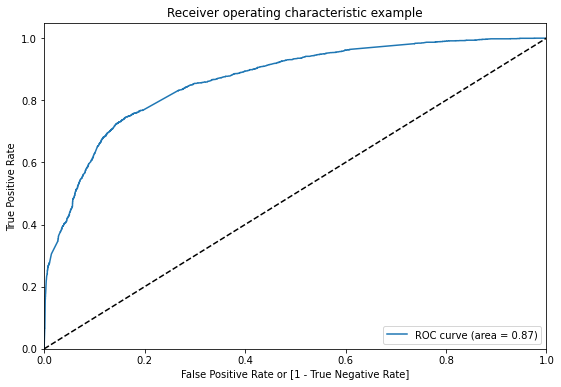

In [105]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

In [106]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.096954,0,1,0,0,0,0,0,0,0,0,0
1,0,0.192039,0,1,1,0,0,0,0,0,0,0,0
2,0,0.306154,0,1,1,1,1,0,0,0,0,0,0
3,1,0.472404,0,1,1,1,1,1,0,0,0,0,0
4,1,0.828433,1,1,1,1,1,1,1,1,1,1,0


In [107]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

In [108]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.538340     0.983647     0.259411
0.2          0.2  0.703826     0.901472     0.580026
0.3          0.3  0.769643     0.833606     0.729577
0.4          0.4  0.804598     0.727310     0.853009
0.5          0.5  0.804125     0.676206     0.884251
0.6          0.6  0.786018     0.576860     0.917029
0.7          0.7  0.767753     0.493050     0.939821
0.8          0.8  0.742875     0.388798     0.964661
0.9          0.9  0.709180     0.255519     0.993342


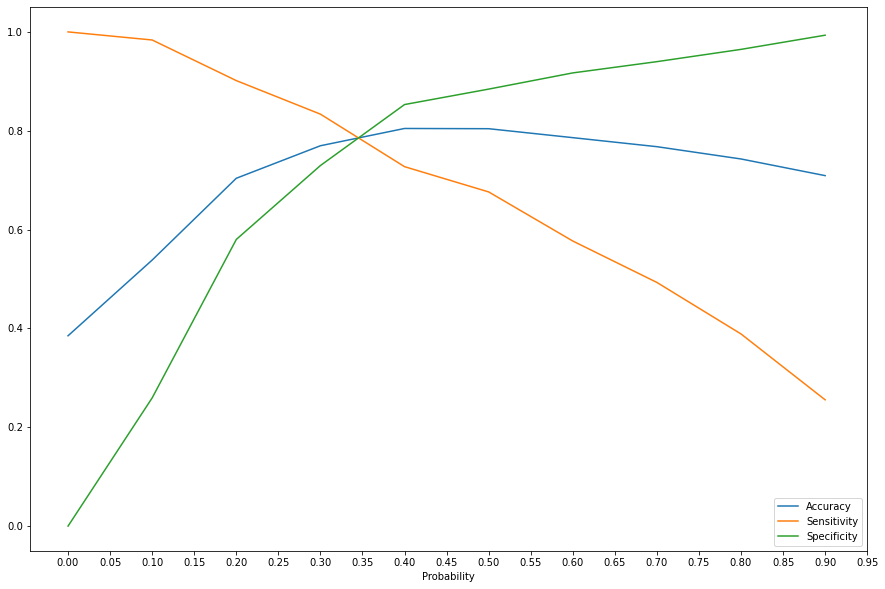

In [109]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(15,10))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Inference :  From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [110]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.096954,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.192039,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.306154,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.472404,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.828433,1,1,1,1,1,1,1,1,1,1,0,1


In [111]:
# Overall accuracy Train After Cut off
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8001889466225791

In [112]:
Confusion_Mat2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
Confusion_Mat2

array([[3249,  656],
       [ 613, 1833]], dtype=int64)

In [113]:
#True positive 
TP = Confusion_Mat2[1,1] 
#True negatives
TN = Confusion_Mat2[0,0] 
#False positives
FP = Confusion_Mat2[0,1] 
#False negatives
FN = Confusion_Mat2[1,0]

#Sensitivity
trainSensitivity=TP / float(TP+FN)
#Specificity
trainSpecificity=TN / float(TN+FP)

# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))
# Positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))


0.16798975672215108
0.7364403374849338
0.8412739513205593


In [114]:
# Assigning lead score
Y_train_pred_final['Lead_Score_Train'] = Y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

Y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score_Train
0,0,0.096954,0,1,0,0,0,0,0,0,0,0,0,0,10
1,0,0.192039,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.306154,0,1,1,1,1,0,0,0,0,0,0,0,31
3,1,0.472404,0,1,1,1,1,1,0,0,0,0,0,1,47
4,1,0.828433,1,1,1,1,1,1,1,1,1,1,0,1,83


In [115]:
precision_train= precision_score(Y_train_pred_final.Converted , Y_train_pred_final.predicted)
precision_train

0.785375118708452

In [116]:
recall_train=recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
recall_train

0.6762060506950123

In [117]:
trainaccuracy= metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
trainaccuracy

0.8001889466225791

In [118]:
trainF1_score_train= 2 * (precision_train * recall_train) / (precision_train + recall_train)
trainF1_score_train

0.726713532513181

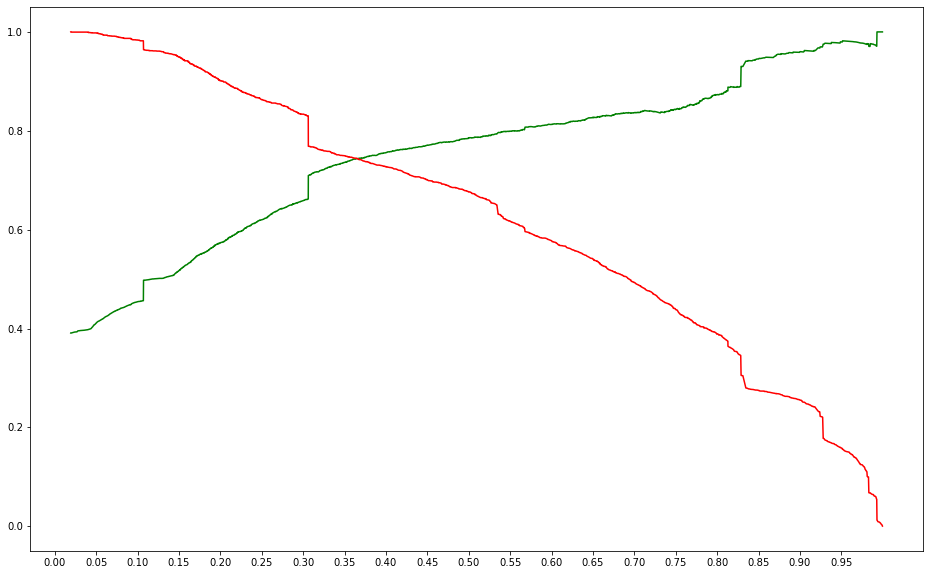

In [119]:
# Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

plt.figure(figsize=(16,10))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### As per Precision-Recall Tradeoff, the cutoff is around 0.375 (between 0.35 and 0.40) . We can choose the cut-off as 0.40 and use the Precision-Recall-Accuracy metrics to evaluate the model.

In [120]:
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
3271,0,0.284772,-0.606338,0.955505,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1490,0,0.643547,1.970301,1.510766,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7936,0,-0.432779,-0.764053,-0.155018,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4216,0,-1.150329,-0.904666,-1.265540,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3830,0,1.719873,-0.593037,2.066027,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [121]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Others,Occupation_Unknown,Occupation_Working Professional
3271,0,-0.606338,0,0,0,0,1,1,0
1490,0,1.970301,1,0,0,0,0,0,1
7936,0,-0.764053,0,0,0,0,1,1,0
4216,0,-0.904666,0,0,1,0,0,0,0
3830,0,-0.593037,1,0,0,0,0,1,0


In [122]:
X_test.shape

(2723, 9)

In [123]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2723, 10)

In [124]:
Y_test_pred = res8.predict(X_test_sm)

In [125]:
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

,0
3271,0.054432
1490,0.978965
7936,0.045916
4216,0.927367
3830,0.060981


In [126]:
#Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [127]:
#Appending y_test_df and Y_test_pred
Y_pred_final = pd.concat([Y_test_df, Y_test_pred],axis=1)
Y_pred_final.head()

,Converted,0
3271,0,0.054432
1490,1,0.978965
7936,0,0.045916
4216,1,0.927367
3830,0,0.060981


In [128]:
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_prob'})
Y_pred_final.head()

,Converted,Converted_prob
3271,0,0.054432
1490,1,0.978965
7936,0,0.045916
4216,1,0.927367
3830,0,0.060981


In [129]:
prob = []
potential_leads = []
for i in np.arange(0.05,1,0.05):
    prob.append(i)
    potential_leads.append(sum(Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)) + 
                           sum(Y_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)))
    projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})
    

In [130]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.05,8490.0
1,0.10,7559.0
2,0.15,6389.0
3,0.20,5457.0
4,0.25,4809.0
5,0.30,4379.0
6,0.35,3504.0
7,0.40,3304.0
8,0.45,3128.0
9,0.50,2976.0


In [131]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.40 else 0)

In [132]:
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [133]:
Y_pred_final.index = Y_pred_final.index.set_names(['Cust_Id'])
Y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Cust_Id,,,,
3271,0,0.054432,0,5
1490,1,0.978965,1,98
7936,0,0.045916,0,5
4216,1,0.927367,1,93
3830,0,0.060981,0,6


### Test Data Statistics

In [134]:
testaccuracy= metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)
testaccuracy

0.8046272493573264

In [135]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
confusion2

array([[1487,  247],
       [ 285,  704]], dtype=int64)

In [136]:
testsensitivity=TP / float(TP+FN)
testsensitivity

0.7493867538838921

In [137]:
testspecificity= TN / float(TN+FP)
testspecificity

0.8320102432778489

In [138]:
precision= precision_score(Y_pred_final.Converted , Y_pred_final.final_predicted)
precision

0.7402733964248159

In [139]:
recall=recall_score(Y_pred_final.Converted , Y_pred_final.final_predicted)
recall

0.7118301314459049

In [140]:
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.7257731958762886

In [141]:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainSensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainSpecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score_train),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :80.02 %
Train Data Sensitivity :74.94 %
Train Data Specificity :83.2 %
Train Data F1 Score    :0.73  
Test Data Accuracy     :80.46 %
Test Data Sensitivity  :74.94 %
Test Data Specificity  :83.2 %
Test Data F1 Score     :0.73  


In [142]:
from sklearn.metrics import classification_report

In [143]:
print (classification_report(Y_train_pred_final['Converted'], Y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3905
           1       0.74      0.75      0.74      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.79      0.79      6351
weighted avg       0.80      0.80      0.80      6351



In [144]:
pd.options.display.float_format = '{:.2f}'.format
new_params= round(res8.params.sort_values(ascending=False),2)
new_params

Lead Source_Welingak Website           5.93
Lead Source_Reference                  3.48
Occupation_Working Professional        2.36
Total Time Spent on Website            1.14
Lead Source_Olark Chat                 1.07
const                                  0.09
Lead Origin_Landing Page Submission   -0.85
Specialization_Others                 -0.95
Occupation_Unknown                    -1.30
Do Not Email                          -1.47
dtype: float64

In [145]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending=False)

Lead Source_Welingak Website          100.00
Lead Source_Reference                  58.68
Occupation_Working Professional        39.80
Total Time Spent on Website            19.22
Lead Source_Olark Chat                 18.04
const                                   1.52
Lead Origin_Landing Page Submission   -14.33
Specialization_Others                 -16.02
Occupation_Unknown                    -21.92
Do Not Email                          -24.79
dtype: float64

In [146]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website           9
Lead Source_Reference                  8
Occupation_Working Professional        7
Total Time Spent on Website            6
Lead Source_Olark Chat                 5
const                                  4
Lead Origin_Landing Page Submission    3
Specialization_Others                  2
Occupation_Unknown                     1
Do Not Email                           0
dtype: int64

<Figure size 864x576 with 0 Axes>

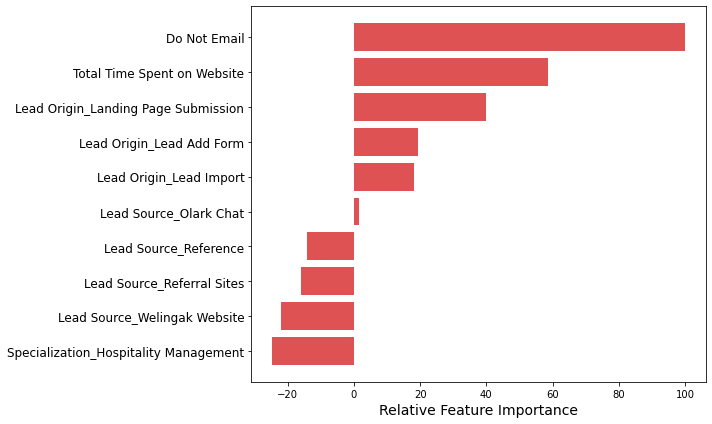

In [147]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

# Recommendations
### X Education Company needs to focus on following key aspects to improve the overall conversion rate:
 -  Increase user engagement with users receiving Emails
 -  Get Total Time Spent on Website increased by advertising and user experience which makes the customer engaging in the website as it contributes in higher conversion
 -  Improve the Welingark Website since this is affecting the conversion negatively
 -  Focus less on Hospitality Management Specialisation as it is majorily a physical service based industry ex Front desk, Cooking etc & cannot be learnt simply over an online course